In [1]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
shape_data = pd.read_csv('Dataset/trafficsigns_dataset/shape_preprocessed.csv')

In [3]:
# Declare the number of classes in the dataset
OUTPUT_CLASSES_SHAPE = 5

In [4]:
def plot_pie_chart(data, target, ax):
    """Plots a pie chart of the target distribution in data"""
    data[target].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=False, startangle=90, ax=ax)

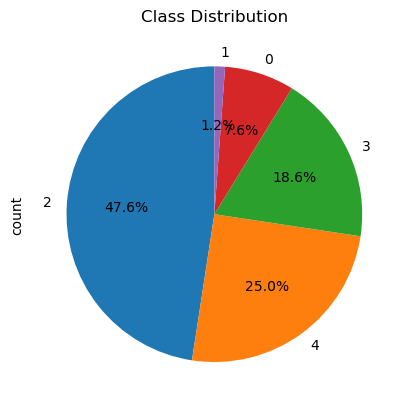

In [5]:
# A pie chart is used to visualize the class distribution
plot_pie_chart(data=shape_data, target='Shape', ax=None)
plt.title('Class Distribution')
plt.show()

Considerable class imbalance can be observed in the dataset. Hence we perform Stratified split to ensure that the distribution of classes is the same in both training and validation sets.

In [6]:
# split shape data into train, test, and validation sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(shape_data, test_size=0.2, random_state=42, stratify=shape_data['Shape'])
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42, stratify=train_data['Shape'])

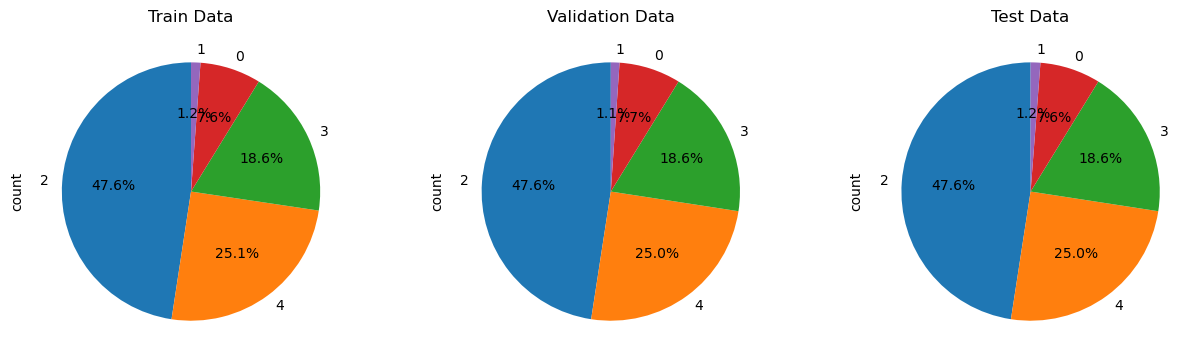

In [7]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 15))  # Adjust the figsize

# Plot the train pie chart in the first subplot
plot_pie_chart(data=train_data, target='Shape', ax=axs[0])
axs[0].set_title('Train Data')

# Plot the validation pie chart in the second subplot
plot_pie_chart(data=val_data, target='Shape', ax=axs[1])
axs[1].set_title('Validation Data')

# Plot the test pie chart in the third subplot
plot_pie_chart(data=test_data, target='Shape', ax=axs[2])
axs[2].set_title('Test Data')
plt.subplots_adjust(wspace=0.3)  

# Display the plot
plt.show()

From the above figure it is clear that we have preserved the class distribution in training, validation and test sets.

In [8]:
# print the shape of the train, validation, and test sets
print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2219, Val Data: 740, Test Data: 740


In [9]:
# convert the target column to string to work with keras ImageDataGenerator
train_data['Shape'] = train_data['Shape'].astype('str')
val_data['Shape'] = val_data['Shape'].astype('str')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalize pixel values and build a data generator
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# choose 32 as the batch size
batch_size = 32

# train and validation generators
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="Path",
        y_col="Shape",
        # All images are already 28x28 so retain the size
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="Path",
        y_col="Shape",
        # All images are already 28x28 so retain the size
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

2024-05-11 15:19:47.234995: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-11 15:19:47.411582: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 15:19:49.961629: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.
